PROYECTO FINAL

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


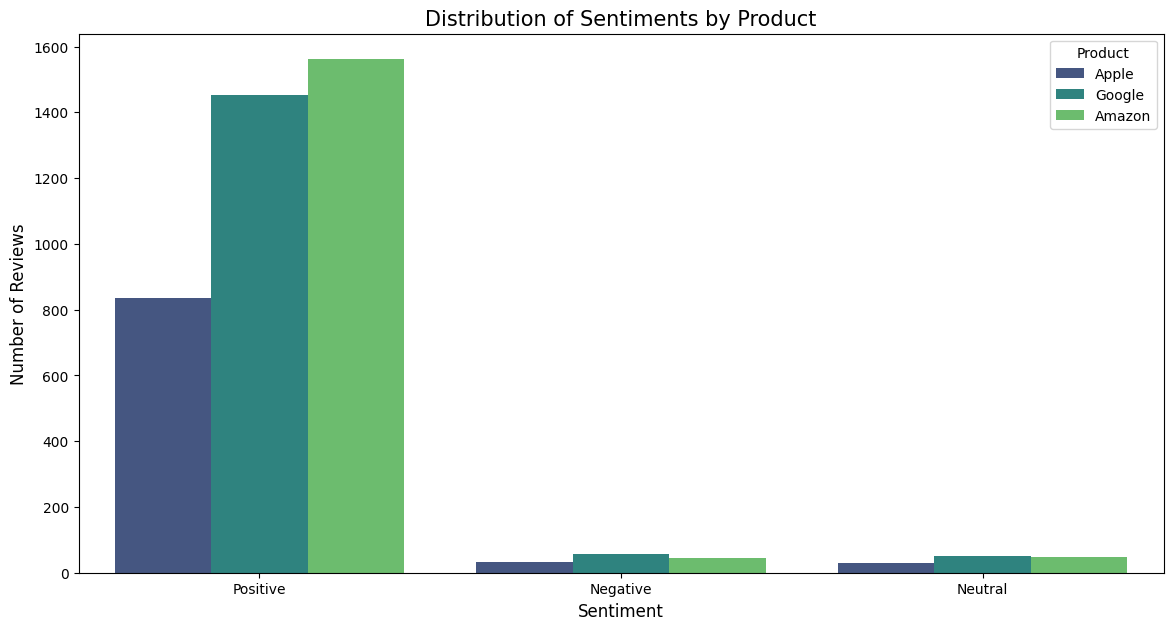

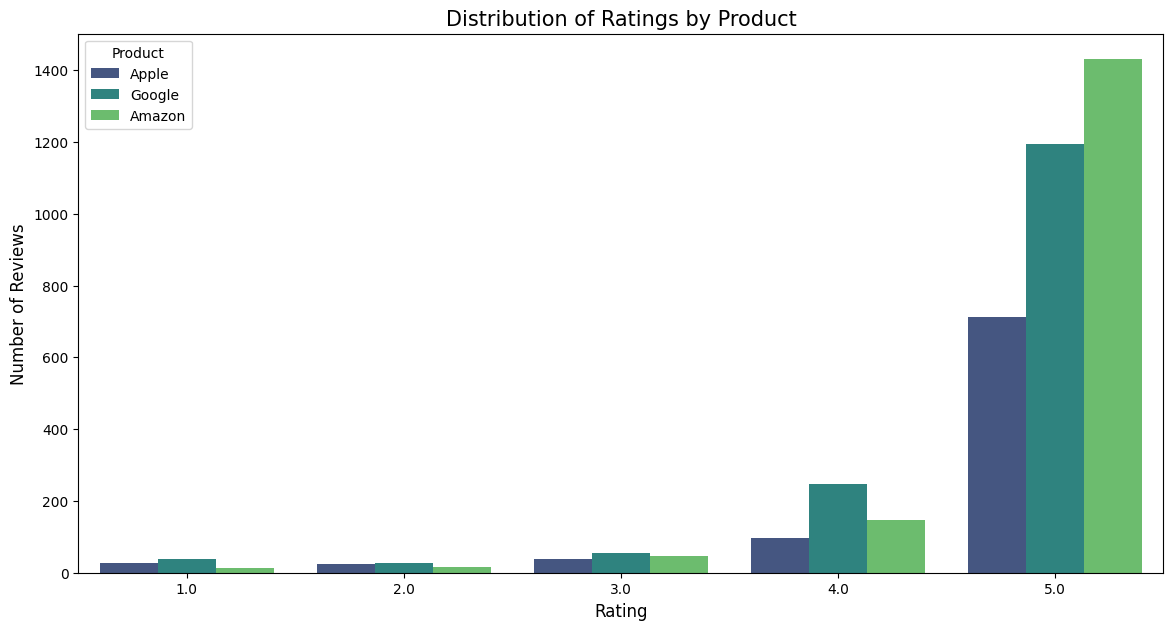

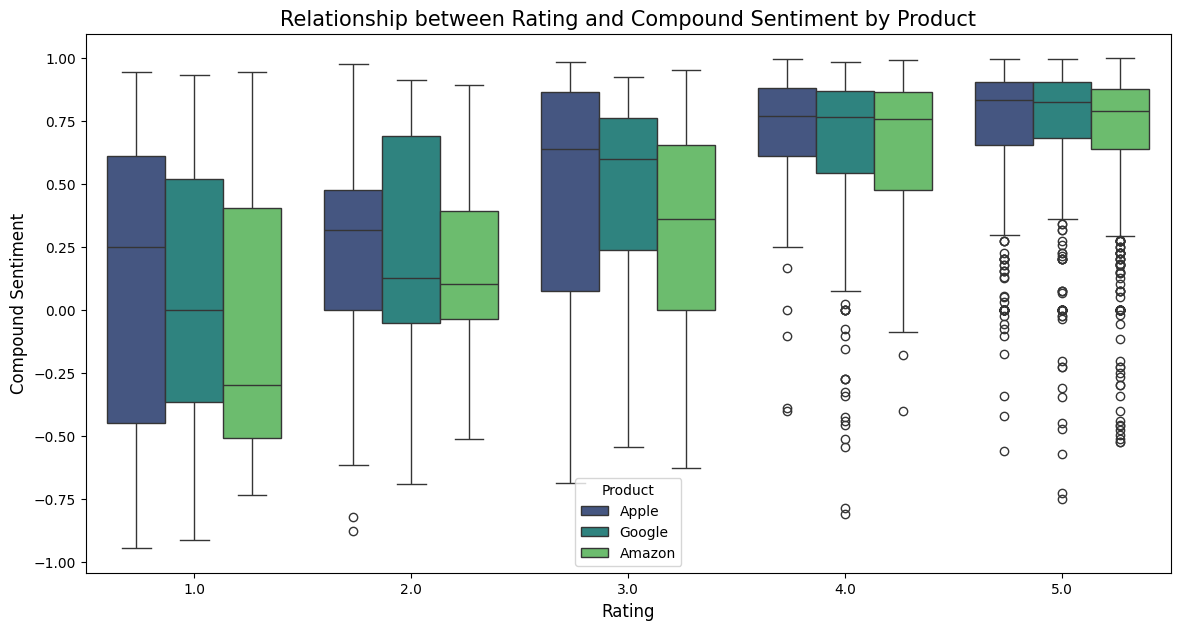


Average Compound Sentiment by Product:
  product  sentiment_compound
0  Amazon            0.687235
1   Apple            0.689003
2  Google            0.699984

Average Rating by Product:
  product    rating
0  Amazon  4.791415
1   Apple  4.602450
2  Google  4.620756

Best Product Based on Sentiment:
product                 Google
sentiment_compound    0.699984
Name: 2, dtype: object

Best Product Based on Rating:
product      Amazon
rating     4.791415
Name: 0, dtype: object

Top Trigrams Mentioned in Positive Apple Reviews:
[('pair', 'apple', 'tv'), ('apple', 'tv', '4k'), ('great', 'sound', 'quality'), ('homepod', '2nd', 'gen'), ('great', 'sound', 'easy')]

Top Bigrams Mentioned in Positive Apple Reviews:
[('apple', 'tv'), ('sound', 'quality'), ('great', 'sound'), ('sound', 'great'), ('stereo', 'pair')]

Top Trigrams Mentioned in Negative Apple Reviews:
[('get', 'better', 'sound'), ('bad', 'useless', 'want'), ('useless', 'want', 'make'), ('want', 'make', 'call'), ('make', 'call', 'zo

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos necesarios de NLTK
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Inicializar el analizador de sentimientos
analyzer = SentimentIntensityAnalyzer()

# Función para limpiar y normalizar el texto
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres no alfanuméricos
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if word not in stop_words]
        lemmatizer = nltk.WordNetLemmatizer()
        filtered_text = [lemmatizer.lemmatize(word) for word in filtered_text]
        return ' '.join(filtered_text)
    else:
        return ''

# Función para obtener el sentimiento categorizado
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Función para calcular el sentimiento compuesto
def calculate_compound_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Función para preprocesar el dataset
def preprocess_data(file_path):
    df = pd.read_excel(file_path)
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df = df.dropna(subset=['rating'])  # Elimina filas con calificaciones nulas
    df['text'].fillna('', inplace=True)
    df['normalized_text'] = df['text'].apply(preprocess_text)
    df['sentiment'] = df['normalized_text'].apply(get_sentiment)
    df['sentiment_compound'] = df['normalized_text'].apply(calculate_compound_sentiment)
    return df

# Función para obtener n-gramas más frecuentes y contextualizados por polaridad
def get_top_ngrams(df, sentiment, n, top_n):
    filtered_texts = df[df['sentiment'] == sentiment]['normalized_text']
    all_ngrams = []
    for text in filtered_texts:
        tokens = nltk.word_tokenize(text)
        ngrams_list = list(ngrams(tokens, n))
        all_ngrams.extend(ngrams_list)
    freq_dist = nltk.FreqDist(all_ngrams)
    top_ngrams = freq_dist.most_common(top_n)
    return top_ngrams

# Especificar los paths de los archivos Excel
apple_path = 'apple.xlsx'
google_path = 'google.xlsx'
amazon_path = 'amazon.xlsx'

# Preprocesar los tres datasets
apple_df = preprocess_data(apple_path)
google_df = preprocess_data(google_path)
amazon_df = preprocess_data(amazon_path)

# Añadir una columna para identificar el producto
apple_df['product'] = 'Apple'
google_df['product'] = 'Google'
amazon_df['product'] = 'Amazon'

# Concatenar los tres datasets en uno solo
all_products_df = pd.concat([apple_df, google_df, amazon_df], ignore_index=True)

# Visualización de la distribución de sentimientos para cada producto
plt.figure(figsize=(14, 7))
sns.countplot(x='sentiment', hue='product', data=all_products_df, palette='viridis')
plt.title('Distribution of Sentiments by Product', fontsize=15)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Product')
plt.show()

# Visualización de la distribución de calificaciones para cada producto
plt.figure(figsize=(14, 7))
sns.countplot(x='rating', hue='product', data=all_products_df, palette='viridis')
plt.title('Distribution of Ratings by Product', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Product')
plt.show()

# Relación entre calificaciones y sentimiento compuesto para cada producto
plt.figure(figsize=(14, 7))
sns.boxplot(x='rating', y='sentiment_compound', hue='product', data=all_products_df, palette='viridis')
plt.title('Relationship between Rating and Compound Sentiment by Product', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Compound Sentiment', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Product')
plt.show()

# Calcula el promedio de sentimiento compuesto por producto
average_sentiment = all_products_df.groupby('product')['sentiment_compound'].mean().reset_index()
print("\nAverage Compound Sentiment by Product:")
print(average_sentiment)

# Calcula el promedio de calificación por producto
average_rating = all_products_df.groupby('product')['rating'].mean().reset_index()
print("\nAverage Rating by Product:")
print(average_rating)

# Determinar el mejor producto basado en el sentimiento promedio y la calificación promedio
best_product_sentiment = average_sentiment.loc[average_sentiment['sentiment_compound'].idxmax()]
best_product_rating = average_rating.loc[average_rating['rating'].idxmax()]

print("\nBest Product Based on Sentiment:")
print(best_product_sentiment)

print("\nBest Product Based on Rating:")
print(best_product_rating)

# Obtener n-gramas más frecuentes y contextualizados por polaridad para cada producto
top_trigrams_positive_apple = get_top_ngrams(apple_df, 'Positive', 3, 5)
top_bigrams_positive_apple = get_top_ngrams(apple_df, 'Positive', 2, 5)

top_trigrams_negative_apple = get_top_ngrams(apple_df, 'Negative', 3, 5)
top_bigrams_negative_apple = get_top_ngrams(apple_df, 'Negative', 2, 5)

top_trigrams_positive_google = get_top_ngrams(google_df, 'Positive', 3, 5)
top_bigrams_positive_google = get_top_ngrams(google_df, 'Positive', 2, 5)

top_trigrams_negative_google = get_top_ngrams(google_df, 'Negative', 3, 5)
top_bigrams_negative_google = get_top_ngrams(google_df, 'Negative', 2, 5)

top_trigrams_positive_amazon = get_top_ngrams(amazon_df, 'Positive', 3, 5)
top_bigrams_positive_amazon = get_top_ngrams(amazon_df, 'Positive', 2, 5)

top_trigrams_negative_amazon = get_top_ngrams(amazon_df, 'Negative', 3, 5)
top_bigrams_negative_amazon = get_top_ngrams(amazon_df, 'Negative', 2, 5)

# Mostrar resultados de n-gramas más repetidos en las revisiones positivas y negativas
def print_ngrams(product, ngrams, ngram_type, sentiment):
    print(f"\nTop {ngram_type.capitalize()} Mentioned in {sentiment} {product} Reviews:")
    print([item[0] for item in ngrams])

print_ngrams('Apple', top_trigrams_positive_apple, 'trigrams', 'Positive')
print_ngrams('Apple', top_bigrams_positive_apple, 'bigrams', 'Positive')
print_ngrams('Apple', top_trigrams_negative_apple, 'trigrams', 'Negative')
print_ngrams('Apple', top_bigrams_negative_apple, 'bigrams', 'Negative')

print_ngrams('Google', top_trigrams_positive_google, 'trigrams', 'Positive')
print_ngrams('Google', top_bigrams_positive_google, 'bigrams', 'Positive')
print_ngrams('Google', top_trigrams_negative_google, 'trigrams', 'Negative')
print_ngrams('Google', top_bigrams_negative_google, 'bigrams', 'Negative')

print_ngrams('Amazon', top_trigrams_positive_amazon, 'trigrams', 'Positive')
print_ngrams('Amazon', top_bigrams_positive_amazon, 'bigrams', 'Positive')
print_ngrams('Amazon', top_trigrams_negative_amazon, 'trigrams', 'Negative')
print_ngrams('Amazon', top_bigrams_negative_amazon, 'bigrams', 'Negative')


In [ ]:
# Calcular el número total de reseñas para cada producto y tipo de sentimiento
sentiment_counts = all_products_df.groupby(['product', 'sentiment']).size().reset_index(name='count')

# Calcular el total de reseñas por producto
total_reviews = all_products_df.groupby('product').size().reset_index(name='total_count')

# Unir los dataframes para calcular los porcentajes
sentiment_percentages = pd.merge(sentiment_counts, total_reviews, on='product')

# Calcular el porcentaje
sentiment_percentages['percentage'] = (sentiment_percentages['count'] / sentiment_percentages['total_count']) * 100

# Mostrar los resultados
print("\nPorcentaje de cada tipo de reseña por producto:")
print(sentiment_percentages[['product', 'sentiment', 'percentage']])



Porcentaje de cada tipo de reseña por producto:
  product sentiment  percentage
0  Amazon  Negative    2.720677
1  Amazon   Neutral    2.902056
2  Amazon  Positive   94.377267
3   Apple  Negative    3.674833
4   Apple   Neutral    3.452116
5   Apple  Positive   92.873051
6  Google  Negative    3.651505
7  Google   Neutral    3.331198
8  Google  Positive   93.017297
